# Plots for validated Data 

In [114]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown
pd.option_context('display.max_columns', -1)
pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution
#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [115]:
#Merge with SModelS DataFrame
dataDF = pd.read_pickle('TRV1bb_data.pcl')
#print(dataDF.columns.values.tolist()) #Print all columns names#
dataDF

filename  mass.5000001  width.5000001  \
0      run_48_MZp_649_gB_1.154425E+00.slha  6.491725e+02   1.141154e-02   
1      run_75_MZp_851_gB_1.288135E+00.slha  8.507492e+02   1.868931e-02   
2    run_316_MZp_1000_gB_5.469112E-01.slha  1.000000e+03   3.963475e-03   
3      run_22_MZp_450_gB_1.154425E+00.slha  4.501474e+02   7.735522e-03   
..                                     ...           ...            ...   
234   run_215_MZp_323_gB_9.312496E-01.slha  3.231884e+02   3.097745e-03   
235   run_282_MZp_700_gB_1.154425E+00.slha  7.000000e+02   1.232349e-02   
236    run_14_MZp_352_gB_1.826514E+00.slha  3.519106e+02   1.378444e-02   
237  run_117_MZp_1151_gB_1.666373E+00.slha  1.150563e+03   4.235161e-02   

        extpar.1  xsec8TeV(fb).5000001   BRs.y1.b,b   BRs.y1.c,c   BRs.y1.q,q  \
0   1.154425e+00          2.182000e+04 1.675849e-01 1.675849e-01 1.675849e-01   
1   1.288135e+00          8.319100e+03 1.669624e-01 1.669624e-01 1.669624e-01   
2   5.469112e-01          7.021900e+02 1.668188e-01 1.668188e-01 1.668188e-01   
3   1.154425e+00          9.422700e+04 1.714290e-01 1.714290e-01 1.714290e-01   
..           ...                   ...          ...          ...          ...   
234 9.312496e-01          2.083100e+05 2.000000e-01 2.000000e-01 2.000000e-01   
235 1.154425e+00          1.585400e+04 1.673337e-01 1.673337e-01 1.673337e-01   
236 1.826514e+00          5.906800e+05 1.882682e-01 1.882682e-01 1.882682e-01   
237 1.666373e+00          3.232800e+03 1.667526e-01 1.667526e-01 1.667526e-01   

     BRs.y1.t-,t+  totalxsec13TeV(fb)  totalxsec8TeV(fb)  \
0    1.620754e-01        0.000000e+00       2.182000e+04   
1    1.651880e-01        0.000000e+00       8.319100e+03   
2    1.659058e-01        0.000000e+00       7.021900e+02   
3    1.428552e-01        0.000000e+00       9.422700e+04   
..            ...                 ...                ...   
234           NaN        0.000000e+00       2.083100e+05   
235  1.633314e-01        0.000000e+00       1.585400e+04   
236  5.865891e-02        0.000000e+00       5.906800e+05   
237  1.662372e-01        0.000000e+00       3.232800e+03   

                                     SMS Decomposition  \
0    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
1    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
2    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
3    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
..                                                 ...   
234  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
235  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
236  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
237  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   

     Total xsec for missing topologies (fb)  \
0                              1.816330e+04   
1                              6.930123e+03   
2                              5.850514e+02   
3                              7.807378e+04   
..                                      ...   
234                            1.666480e+05   
235                            1.320109e+04   
236                            4.794737e+05   
237                            2.693723e+03   

     Total xsec for missing topologies with displaced decays (fb)  \
0                                         0.000000e+00              
1                                         0.000000e+00              
2                                         0.000000e+00              
3                                         0.000000e+00              
..                                                 ...              
234                                       0.000000e+00              
235                                       0.000000e+00              
236                                       0.000000e+00              
237                                       0.000000e+00              

     Total xsec for missing topologies with prompt decays (fb)  \
0                                         2.182000e+04        

In [116]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 8)
pd.set_option('display.float_format', '{:e}'.format)
dataDF

filename  mass.5000001  width.5000001  \
0      run_48_MZp_649_gB_1.154425E+00.slha  6.491725e+02   1.141154e-02   
1      run_75_MZp_851_gB_1.288135E+00.slha  8.507492e+02   1.868931e-02   
2    run_316_MZp_1000_gB_5.469112E-01.slha  1.000000e+03   3.963475e-03   
3      run_22_MZp_450_gB_1.154425E+00.slha  4.501474e+02   7.735522e-03   
..                                     ...           ...            ...   
234   run_215_MZp_323_gB_9.312496E-01.slha  3.231884e+02   3.097745e-03   
235   run_282_MZp_700_gB_1.154425E+00.slha  7.000000e+02   1.232349e-02   
236    run_14_MZp_352_gB_1.826514E+00.slha  3.519106e+02   1.378444e-02   
237  run_117_MZp_1151_gB_1.666373E+00.slha  1.150563e+03   4.235161e-02   

        extpar.1  xsec8TeV(fb).5000001   BRs.y1.b,b   BRs.y1.c,c   BRs.y1.q,q  \
0   1.154425e+00          2.182000e+04 1.675849e-01 1.675849e-01 1.675849e-01   
1   1.288135e+00          8.319100e+03 1.669624e-01 1.669624e-01 1.669624e-01   
2   5.469112e-01          7.021900e+02 1.668188e-01 1.668188e-01 1.668188e-01   
3   1.154425e+00          9.422700e+04 1.714290e-01 1.714290e-01 1.714290e-01   
..           ...                   ...          ...          ...          ...   
234 9.312496e-01          2.083100e+05 2.000000e-01 2.000000e-01 2.000000e-01   
235 1.154425e+00          1.585400e+04 1.673337e-01 1.673337e-01 1.673337e-01   
236 1.826514e+00          5.906800e+05 1.882682e-01 1.882682e-01 1.882682e-01   
237 1.666373e+00          3.232800e+03 1.667526e-01 1.667526e-01 1.667526e-01   

     BRs.y1.t-,t+  totalxsec13TeV(fb)  totalxsec8TeV(fb)  \
0    1.620754e-01        0.000000e+00       2.182000e+04   
1    1.651880e-01        0.000000e+00       8.319100e+03   
2    1.659058e-01        0.000000e+00       7.021900e+02   
3    1.428552e-01        0.000000e+00       9.422700e+04   
..            ...                 ...                ...   
234           NaN        0.000000e+00       2.083100e+05   
235  1.633314e-01        0.000000e+00       1.585400e+04   
236  5.865891e-02        0.000000e+00       5.906800e+05   
237  1.662372e-01        0.000000e+00       3.232800e+03   

                                     SMS Decomposition  \
0    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
1    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
2    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
3    [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
..                                                 ...   
234  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
235  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
236  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   
237  [{'ID': 1, 'SMS': '(PV > y1)', 'Masses (GeV)':...   

     Total xsec for missing topologies (fb)  \
0                              1.816330e+04   
1                              6.930123e+03   
2                              5.850514e+02   
3                              7.807378e+04   
..                                      ...   
234                            1.666480e+05   
235                            1.320109e+04   
236                            4.794737e+05   
237                            2.693723e+03   

     Total xsec for missing topologies with displaced decays (fb)  \
0                                         0.000000e+00              
1                                         0.000000e+00              
2                                         0.000000e+00              
3                                         0.000000e+00              
..                                                 ...              
234                                       0.000000e+00              
235                                       0.000000e+00              
236                                       0.000000e+00              
237                                       0.000000e+00              

     Total xsec for missing topologies with prompt decays (fb)  \
0                                         2.182000e+04        

#### Set r = 0 for points with no results 

In [117]:
#Set points without results with r == 0
dataDF.fillna(value={'ExptRes.result0.r' : 0.0},inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)


#### Define exclusions

In [118]:
#Add simple flag for excluded points:
dataDF['excludedLHC'] = dataDF['ExptRes.result0.r'] > 1.0


### Get points excluded:

In [119]:
excluded = dataDF[dataDF['excludedLHC'] == True]

allowed = dataDF[(dataDF['excludedLHC'] == False)]


print('Total number of points = %i' %len(dataDF))
print('Total excluded (LHC) = %i'%(len(excluded)))
print('Total allowed = %i\n'%(len(allowed)))

# print('Total excluded (r > %1.2f) = %i'%(rscale,len(excludedSC)))
# print('Total allowed (r > %1.2f) = %i'%(rscale,len(allowedSC)))


Total number of points = 238
Total excluded (LHC) = 142
Total allowed = 96



### Create analysis label for excluded points

In [120]:
anas = excluded['ExptRes.result0.AnalysisID'].value_counts()
anas.sort_values(inplace=True,ascending=False)

    
labels = []
for index, row in excluded.iterrows():
    ana = row['ExptRes.result0.AnalysisID']
    txList = sorted(row['ExptRes.result0.TxNames'])
    label = ana + ' (' + ','.join(txList) + ')'
    label = label.replace('off','') #Group together on and off-shell topologies
    labels.append(label)
excluded['label'] = labels


In [121]:
nexcluded = [[len(excluded[excluded['label'] == label]),label] for label in excluded['label'].unique()]
nexcluded = sorted(nexcluded,reverse=True)
nexcluded = np.array(nexcluded)
print(excluded.shape)


(142, 54)


In [122]:
for label in nexcluded[:,1]:
    print(label+': %i'%len(excluded[excluded['label'] == label]))
    

CMS-EXO-16-057 (TRV1bb): 142


### Define colors and plotting order

In [123]:
data_paper1 = pd.read_csv('/home/yoxara/smodels-database/8TeV/CMS/CMS-EXO-16-057/orig/XSECBrbb_MZp_Exp.csv')
data_paper1.columns = data_paper1.columns.str.strip()
print(data_paper1.columns)  # Check the cleaned column names
data_paper2 = pd.read_csv('/home/yoxara/smodels-database/8TeV/CMS/CMS-EXO-16-057/orig/XSECBrbb_MZp_Obs.csv')
data_paper2.columns = data_paper2.columns.str.strip()
print(data_paper2.columns)  # Check the cleaned column names


Index(['#MZp [GeV]', 'xsecBr [pb]'], dtype='object')
Index(['#MZp [GeV]', 'xsecBr [pb]'], dtype='object')


In [124]:
MZp_exp = data_paper1['#MZp [GeV]'].values
MZp_obs = data_paper2['#MZp [GeV]'].values
xsec_pb_exp = data_paper1['xsecBr [pb]'].values
xsec_pb_obs = data_paper2['xsecBr [pb]'].values
xsec_fb_exp = [x * 1000 for x in xsec_pb_exp]
xsec_fb_obs = [x * 1000 for x in xsec_pb_obs]
xsec_pb_exp


array([27.51875333, 18.80419725, 11.65447397, 10.98956753,  9.76611558,
        9.11952956,  6.47718939,  5.00544804,  4.32411506,  3.49669716,
        3.33500119,  3.11944427,  2.88940812,  2.70450072,  2.22836551,
        1.68585558,  1.48448504,  1.32531861,  1.10744397,  0.89936319,
        0.81808214,  0.75475028,  0.72980872,  0.70569139,  0.69862646,
        0.69162101,  0.65917709,  0.61612981,  0.58722718,  0.55968948,
        0.54100892])

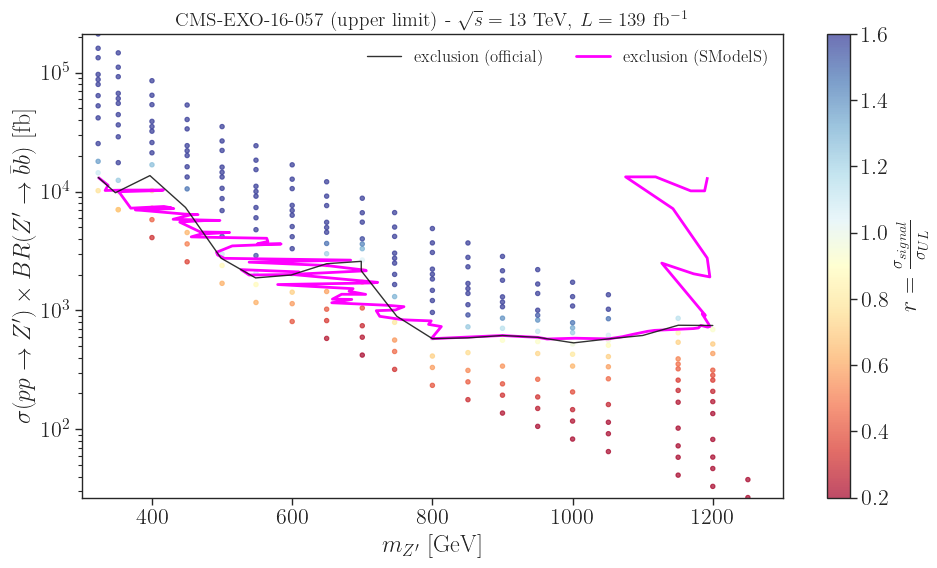

In [125]:
from scipy.interpolate import griddata

cm = plt.colormaps['RdYlBu']
plt.figure(figsize=(10,6))
#dataDF = dataDF[dataDF['extpar.1'] >= 0.08].reset_index(drop=True)
#dataDF = dataDF[dataDF['mass.5000001'] <= 1205].reset_index(drop=True)
x = dataDF['mass.5000001']
y = dataDF['xsec8TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']

levels = [1.0]  
#cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=1.)
#plt.tricontour(x, y, c, levels, colors='magenta', linestyles='solid')
order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
sc = plt.scatter(x, y, c=c, s=10, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)
levels = [1.0]  
cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
#xi = np.linspace(min(x), max(x), 1000)
#yi = np.linspace(min(y), max(y), 1000)
#xi, yi = np.meshgrid(xi, yi)
#zi = griddata((x, y), c, (xi, yi), method='linear')
#cs = plt.contour(xi, yi, zi, levels=[1.0], colors='magenta', linestyles='solid')


smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
observed_line, = plt.plot(MZp_obs, xsec_fb_obs, '-', color='k', linewidth=1, alpha=0.9, label='exclusion (official)')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$ [fb]')
plt.xlim(300, 1300)
#plt.ylim(1e-02, 1e04)
plt.yscale('log')
plt.title('CMS-EXO-16-057 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 139$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.show()

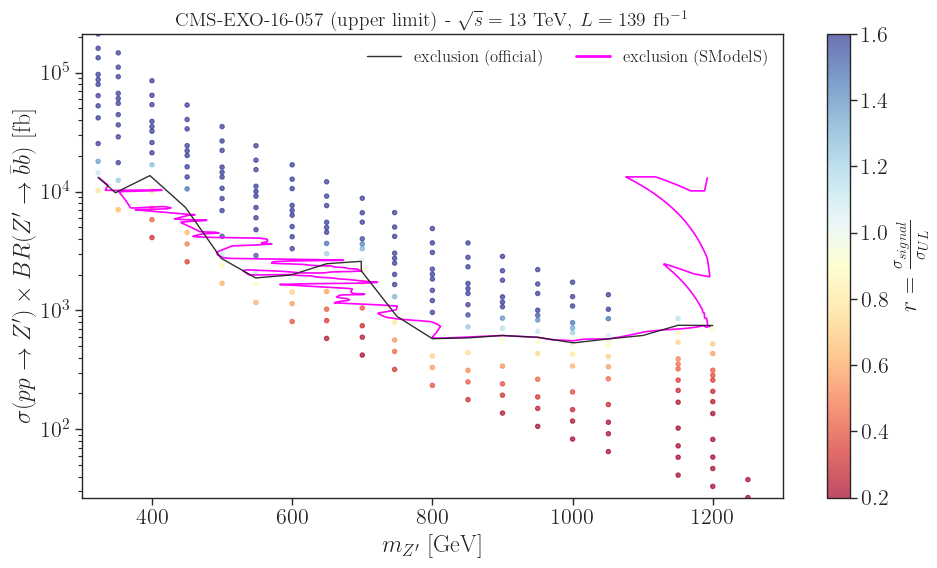

In [126]:
from scipy.interpolate import griddata

cm = plt.colormaps['RdYlBu']
plt.figure(figsize=(10,6))
#dataDF = dataDF[dataDF['extpar.1'] >= 0.08].reset_index(drop=True)
#dataDF = dataDF[dataDF['mass.5000001'] <= 1205].reset_index(drop=True)
x = dataDF['mass.5000001']
y = dataDF['xsec8TeV(fb).5000001'] * (dataDF['BRs.y1.b,b'])
c = dataDF['ExptRes.result0.r']
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(c)
x, y, c = x[mask], y[mask], c[mask]
order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
sc = plt.scatter(x, y, c=c, s=10, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)
#levels = [1.0]  
#cs = plt.tricontour(x, y, c, levels=levels, colors='magenta', linestyles='solid', linewidths=2.)
xi = np.linspace(min(x), max(x), 3000)
yi = np.linspace(min(y), max(y), 3000)
xi, yi = np.meshgrid(xi, yi)
zi = griddata((x, y), c, (xi, yi), method='linear')
cs = plt.contour(xi, yi, zi, levels=[1.0], colors='magenta', linestyles='solid')
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
observed_line, = plt.plot(MZp_obs, xsec_fb_obs, '-', color='k', linewidth=1, alpha=0.9, label='exclusion (official)')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
cbar = plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{U L}}$')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$ [fb]')
plt.xlim(300, 1300)
#plt.ylim(1e-02, 1e04)
plt.yscale('log')
plt.title('CMS-EXO-16-057 (upper limit) -  $\sqrt{s} = 13$ TeV, $L = 139$ fb$^{-1}$', fontsize=14)
plt.tight_layout()
plt.show()

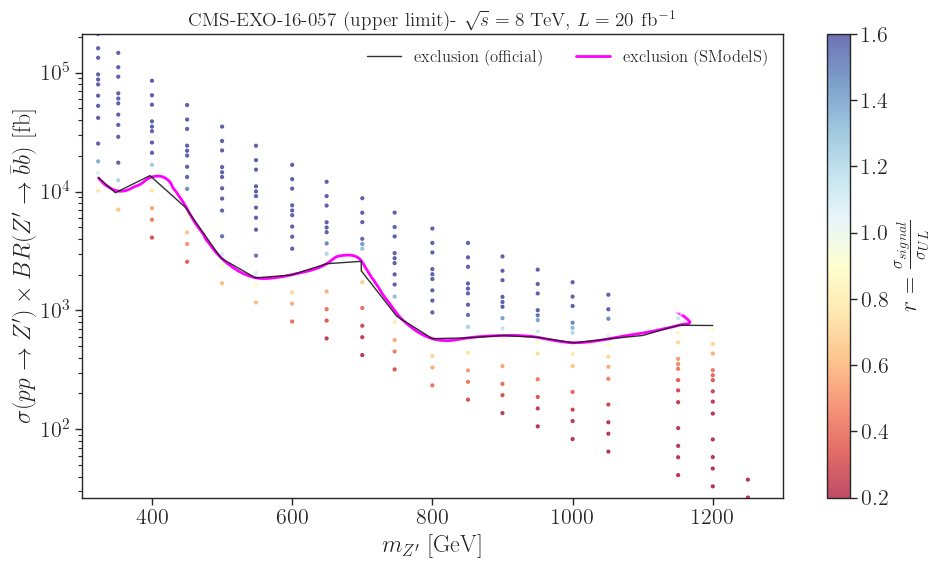

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(c)
x, y, c = x[mask], y[mask], c[mask]
order = c.argsort()
x, y, c = x.iloc[order], y.iloc[order], c.iloc[order]
xi = np.linspace(x.min(), x.max(), 2000)
log_yi = np.linspace(np.log10(y.min()), np.log10(y.max()), 2000)
xi, log_yi = np.meshgrid(xi, log_yi)
zi = griddata((x, np.log10(y)), c, (xi, log_yi), method='cubic')
yi = 10**log_yi
plt.figure(figsize=(10, 6))
sc = plt.scatter(x, y, c=c, s=5, cmap=cm, vmin=0.2, vmax=1.6, alpha=0.7)
levels = [1.0]
cs = plt.contour(xi, yi, zi, levels=levels, colors='magenta', linestyles='solid', linewidths=2)
smodels_proxy = plt.Line2D([0], [0], color='magenta', linewidth=2., linestyle='solid', label='exclusion (SModelS)')
observed_line, = plt.plot(MZp_obs, xsec_fb_obs, '-', color='k', linewidth=1, alpha=0.9, label='exclusion (official)')
plt.legend(handles=[observed_line, smodels_proxy], loc='upper right', framealpha=0.0, fontsize=12, ncol=2)
plt.colorbar(sc, label=r'$r = \frac{\sigma_{signal}}{\sigma_{UL}}$')
plt.yscale('log')
plt.xlabel(r'$m_{Z^{\prime}}$ [GeV]')
plt.ylabel(r'$\sigma (p p \to Z^{\prime}) \times BR(Z^{\prime} \to \bar{b} b)$ [fb]')
plt.xlim(300, 1300)
plt.ylim(y.min(), y.max())
plt.title('CMS-EXO-16-057 (upper limit)- $\sqrt{s} = 8$ TeV, $L = 20$ fb$^{-1}$', fontsize=14) #- $Z_{B}^{\prime}$ model')
plt.tight_layout()
plt.savefig('CMS-EXO-16-057.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [128]:
(5*4.97359197162173)*(2.981433e+01/1000)

0.7414215616364045

In [129]:
(5*0.13815533254504803)*(8.281758e-01 /1000)

0.0005720845152738059